In [1]:
import matplotlib.pyplot as plt
import os
import sys
import string

In [2]:
def parse(line):
    # return a dict 
    items = line.split()
    ret = {}
    for i in range(0,len(items)-1):
        if(items[i] in ["Epoch:", "Test:"] or (len(items) < 6 and items[i][0] in string.ascii_letters)):
            ret[items[i]] = items[i+1]
        elif(items[i][0] in string.ascii_letters):
            ret[items[i]] = items[i+2][1:-1]
#         Epoch: Time 0.011 (0.011)	Data 0.003 (0.003)	Loss 3.7305 (3.7305)	Prec@1 0.000 (0.000)	Prec@5 56.250 (56.250)
    return ret
TrainPrec1 = [None]
TrainPrec5 = [None]
TestPrec1 = []
TestPrec5 = []
with open("../tmp/nohup.out","r") as f:
    for l in f.readlines():
        itms = parse(l)
        print(itms)
        if("Epoch:" in itms.keys()): # training phase
            TrainPrec1[-1] = float(itms['Prec@1'])
            TrainPrec5[-1] = float(itms['Prec@5'])
        elif("Test:" not in itms.keys()): # validating phase
            TestPrec1.append(float(itms['Prec@1']))
            TestPrec5.append(float(itms['Prec@5']))
            TrainPrec1.append(None)
            TrainPrec5.append(None)
TrainPrec1 = TrainPrec1[:-1]
TrainPrec5 = TrainPrec5[:-1]
print(TrainPrec1)
print(TrainPrec5)
print(TestPrec1)
print(TestPrec5)

{'Epoch:': '[0][0/965]', 'Time': '0.032', 'Data': '0.010', 'Loss': '6.2061', 'Prec@1': '0.000', 'Prec@5': '0.000'}
{'Epoch:': '[0][400/965]', 'Time': '0.013', 'Data': '0.007', 'Loss': '5.5903', 'Prec@1': '3.709', 'Prec@5': '13.295'}
{'Epoch:': '[0][800/965]', 'Time': '0.013', 'Data': '0.007', 'Loss': '4.9289', 'Prec@1': '5.165', 'Prec@5': '18.048'}
{'Test:': '[0/419]', 'Time': '0.012', 'Loss': '4.0457', 'Prec@1': '6.250', 'Prec@5': '37.500'}
{'Test:': '[400/419]', 'Time': '0.014', 'Loss': '4.1479', 'Prec@1': '8.074', 'Prec@5': '26.512'}
{'Prec@1': '8.097', 'Prec@5': '26.531'}
{'Epoch:': '[1][0/965]', 'Time': '0.028', 'Data': '0.018', 'Loss': '3.5243', 'Prec@1': '12.500', 'Prec@5': '43.750'}
{'Epoch:': '[1][400/965]', 'Time': '0.016', 'Data': '0.009', 'Loss': '3.7953', 'Prec@1': '13.466', 'Prec@5': '36.206'}
{'Epoch:': '[1][800/965]', 'Time': '0.016', 'Data': '0.009', 'Loss': '3.7781', 'Prec@1': '13.787', 'Prec@5': '36.532'}
{'Test:': '[0/419]', 'Time': '0.013', 'Loss': '4.0249', 'Prec@

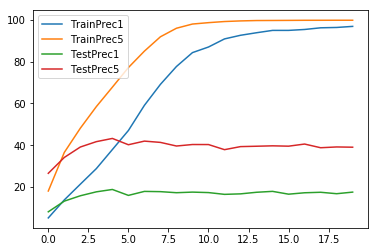

In [3]:
X = [i for i in range(len(TestPrec1))]
plt.plot(X,TrainPrec1,label = "TrainPrec1")
plt.plot(X,TrainPrec5,label = "TrainPrec5")
plt.plot(X,TestPrec1,label = "TestPrec1")
plt.plot(X,TestPrec5,label = "TestPrec5")
plt.legend()
plt.show()

In [ ]:
haha